Домашняя работа №1.2 (проверка статистистических гипотез)
D Данной работе используется ыборка, собранная в ходе проведения A/B тестирования в мобильной игре Cookie Cats.

В данной игре устанавливается временное ограничение на число уровней, которые игрок может пройти подряд. Первое такое ограничение находится на 30 уровне, то есть, после прохождения первых 30 уровней игры, игроку необходимо подождать некоторое время или заплатить деньги, чтобы продолжить играть. В тестировании первое ограничение было смещено на 40 уровень для некоторых игроков.

Выборка содержит данные для 90189 игроков. Для каждого игрока указана версия игры (version) принимающая значения gate_30 и gate_40 соответственно для разных уровней ограничений. Также присутствует колонка sum_gamerounds содержащая общее число игровых раундов для игрока в первые 7 дней после установки. Таким образом, необходимо понять, повлияло ли смещение первого ограничения на заинтересованность игрой. Заинтересованность будем измерять по параметру sum_gamerounds, то есть числу игровых раундов в первые 7 дней. Данную задачу можно свести к проверке гипотезы об однородности двух выборок, где первая выборка содержит число игровых раундов для каждого игрока в стандартной версии игры с ограничением на 30 уровне, а вторая выборка — число игровых раундов для игроков в версии с ограничением на 40 уровне.

Импорты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore, mannwhitneyu, ttest_ind
pd.options.mode.chained_assignment = None # disable warnings

Загрузка датасета

In [2]:
df = pd.read_csv('./data_statistics/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Его размерность

In [3]:
df.shape

(90189, 5)

Описание

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


Разбиванием группы по версиям

gate_30

In [6]:
first = df[df['version'] == 'gate_30']
first

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False


In [7]:
first.describe()

,userid,sum_gamerounds
count,4.470000e+04,44700.000000
mean,4.987564e+06,52.456264
std,2.881026e+06,256.716423
min,1.160000e+02,0.000000
25%,2.505469e+06,5.000000
50%,4.983631e+06,17.000000
75%,7.481497e+06,50.000000
max,9.999710e+06,49854.000000


gate_40

In [8]:
second = df[df['version'] == 'gate_40']
second

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False
...,...,...,...,...,...
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False


In [9]:
second.describe()

,userid,sum_gamerounds
count,4.548900e+04,45489.000000
mean,5.009073e+06,51.298776
std,2.885496e+06,103.294416
min,3.770000e+02,0.000000
25%,2.517171e+06,5.000000
50%,5.007329e+06,16.000000
75%,7.510762e+06,52.000000
max,9.999861e+06,2640.000000


смотрим статистику

In [10]:
second['sum_gamerounds'].count()

np.int64(45489)

In [11]:
second['sum_gamerounds'].mean()

np.float64(51.29877552814966)

Для гистрогаммы сначала посмотри частоту значений

In [12]:
first_counts = first['sum_gamerounds'].value_counts()
second_counts = second['sum_gamerounds'].value_counts()

print(first_counts)
print(second_counts)


sum_gamerounds
1      2749
2      2198
0      1937
3      1899
4      1831
       ... 
641       1
617       1
633       1
605       1
572       1
Name: count, Length: 779, dtype: int64
sum_gamerounds
1      2789
2      2408
3      2059
0      2057
4      1798
       ... 
717       1
473       1
897       1
975       1
708       1
Name: count, Length: 792, dtype: int64


Построим графики

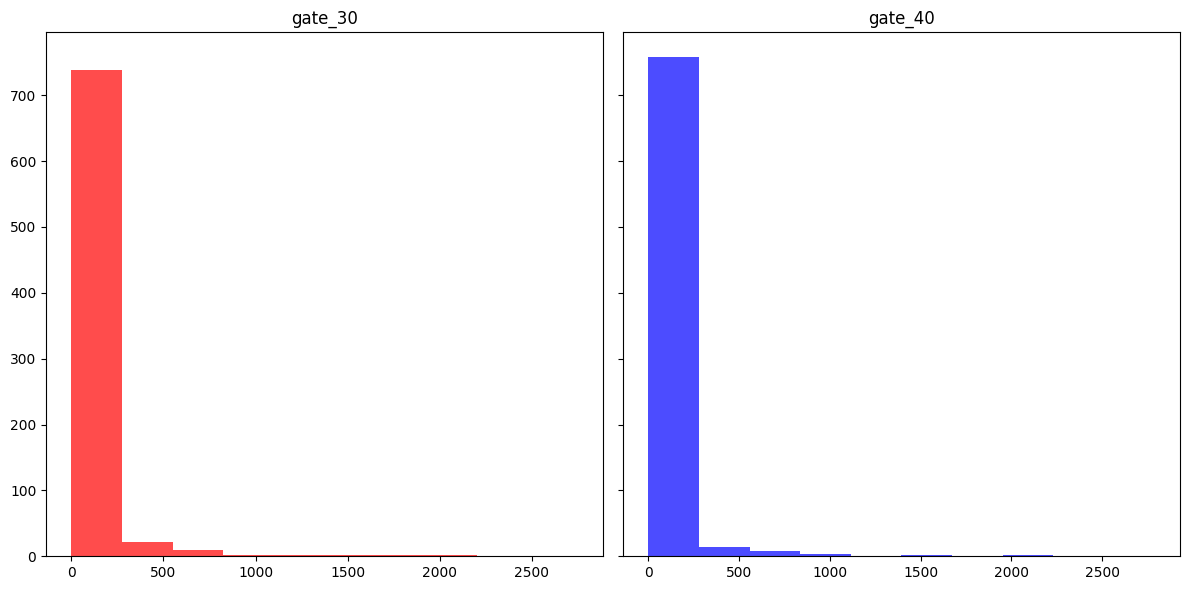

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axes[0].hist(first_counts, color='red', alpha=0.7)
axes[0].set_title('gate_30')
axes[1].hist(second_counts, color='blue', alpha=0.7)
axes[1].set_title('gate_40')

plt.tight_layout()
plt.show()

<Axes: >

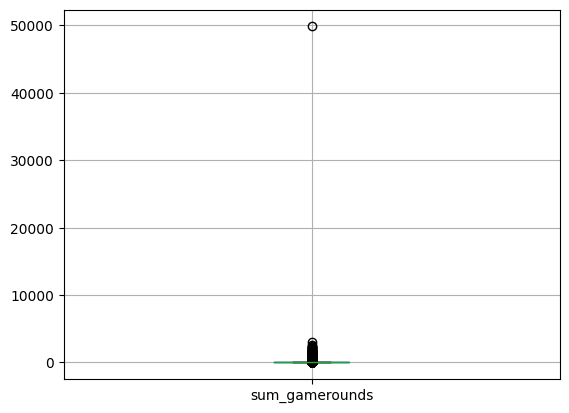

In [14]:
df.boxplot('sum_gamerounds')

<Axes: >

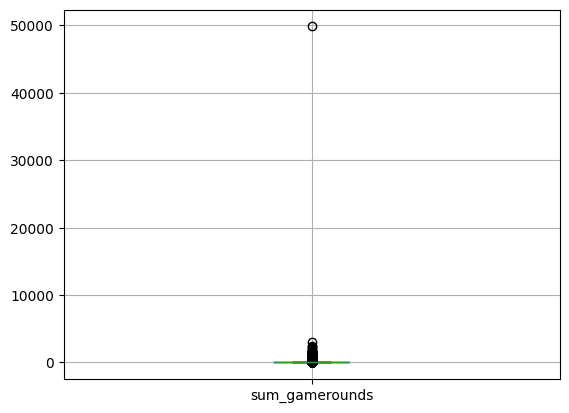

In [15]:
first.boxplot('sum_gamerounds')

<Axes: >

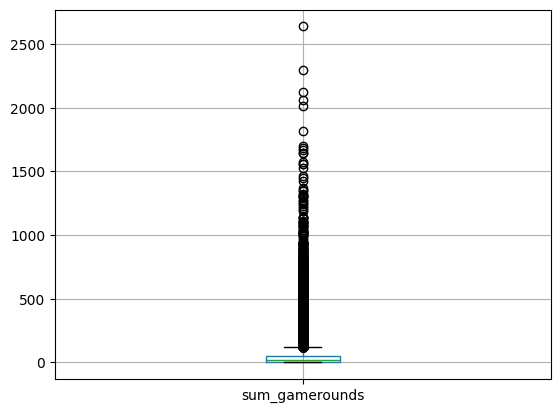

In [16]:
second.boxplot('sum_gamerounds')

Видим выбросы
- 50000 игр
- 2500

Найдем `z-score` выбросов

In [17]:
first['z_score'] = zscore(first['sum_gamerounds'])
first_outliers = first[abs(first['z_score']) > 3]
print("gate_30:\n", first_outliers)

gate_30:
         userid  version  sum_gamerounds  retention_1  retention_7   z_score
601      63617  gate_30             902         True         True  3.309306
655      69927  gate_30            1906         True         True  7.220280
1097    121303  gate_30            1374         True         True  5.147931
2257    248748  gate_30            1309         True         True  4.894731
2586    284610  gate_30            1252         True         True  4.672693
...        ...      ...             ...          ...          ...       ...
84885  9409315  gate_30            1490         True         True  5.599797
86398  9570134  gate_30             823         True         True  3.001570
87007  9640085  gate_30            2156         True         True  8.194128
87508  9693708  gate_30             926         True         True  3.402796
89921  9971042  gate_30             892         True         True  3.270352

[92 rows x 6 columns]


In [18]:
second['z_score'] = zscore(second['sum_gamerounds'])
second_outliers = second[abs(second['z_score']) > 3]
print("gate_40:\n", second_outliers)

gate_40:
         userid  version  sum_gamerounds  retention_1  retention_7   z_score
237      22299  gate_40             493         True         True  4.276185
394      39774  gate_40             567         True         True  4.992592
541      56496  gate_40             543         True         True  4.760244
551      57369  gate_40             399         True         True  3.366155
640      68394  gate_40             474         True         True  4.092243
...        ...      ...             ...          ...          ...       ...
89719  9949589  gate_40             708         True         True  6.357637
89759  9953704  gate_40             502         True         True  4.363316
89813  9960649  gate_40             494         True         True  4.285867
89902  9968196  gate_40             442         True         True  3.782446
90115  9990636  gate_40             569         True         True  5.011955

[905 rows x 6 columns]


Во втором случае их намного больше

Проверим статистическую значимость, используя критерий *Манна-Уитни*

In [19]:
stat, p_value = mannwhitneyu(first['sum_gamerounds'], second['sum_gamerounds'], alternative='two-sided')
print(f"stat: {stat}\np-value: {p_value}")

if p_value < 0.05: print("нулевая гипотеза не подходит")
else:              print("нулевая гипотеза подходит")

stat: 1024331250.5
p-value: 0.05020880772044255
нулевая гипотеза подходит


Проверим *тест Стьюдента*

In [20]:
stat, p_value_ = ttest_ind(first['sum_gamerounds'], second['sum_gamerounds'], equal_var=False)
print(f"stat: {stat}\np-value: {p_value}")

if p_value < 0.05: print("нулевая гипотеза не подходит")
else:              print("нулевая гипотеза подходит")

stat: 0.8854374331270672
p-value: 0.05020880772044255
нулевая гипотеза подходит



**Ответ - перемещение ограничения с 30 на 40 gate не повлияло на заинтересованность игроков**